# Second Hand Vehicle price prediction using Multi Linear regression

In [1]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
car_data = pd.read_csv('C:/Users/BHARATH KUMARA/Desktop/CAR DETAILS.csv')

In [3]:
car_data.head()

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_Name       4340 non-null   object
 1   Year           4340 non-null   int64 
 2   Selling_Price  4340 non-null   int64 
 3   Kms_Driven     4340 non-null   int64 
 4   Fuel_Type      4340 non-null   object
 5   Seller_Type    4340 non-null   object
 6   Transmission   4340 non-null   object
 7   Owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
car_data.describe()

,Year,Selling_Price,Kms_Driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [7]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
print(car_data['Fuel_Type'].value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: Fuel_Type, dtype: int64


In [9]:
print(car_data['Seller_Type'].value_counts())

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: Seller_Type, dtype: int64


In [10]:
print(car_data['Transmission'].value_counts())

Manual       3892
Automatic     448
Name: Transmission, dtype: int64


In [11]:
fuel_type = car_data['Fuel_Type']
seller_type = car_data['Seller_Type']
transmission_type = car_data['Transmission']
selling_price = car_data['Selling_Price']


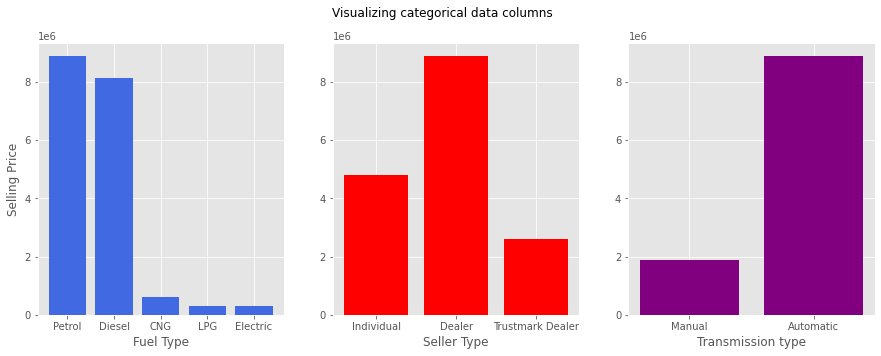

In [12]:
from matplotlib import style

style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(1,3,1)
plt.bar(fuel_type,selling_price, color='royalblue')
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(1,3,2)
plt.bar(seller_type, selling_price, color='red')
plt.xlabel("Seller Type")
plt.subplot(1,3,3)
plt.bar(transmission_type, selling_price, color='purple')
plt.xlabel('Transmission type')
plt.show()

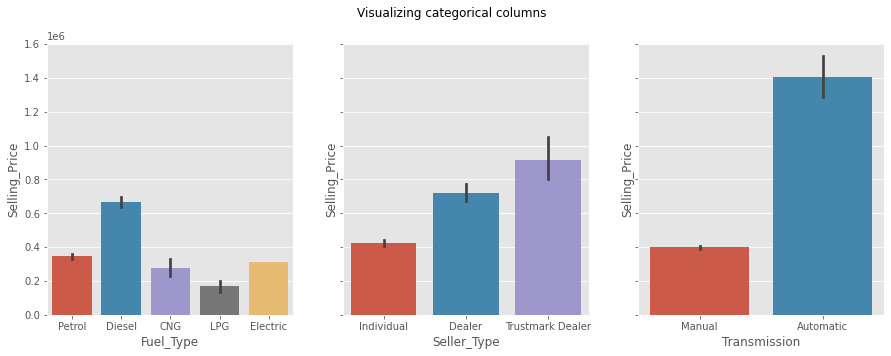

In [13]:
fig, axes = plt.subplots(1,3,figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.barplot(x=fuel_type, y=selling_price, ax=axes[0])
sns.barplot(x=seller_type, y=selling_price, ax=axes[1])
sns.barplot(x=transmission_type, y=selling_price, ax=axes[2])

In [14]:
petrol_data = car_data.groupby('Fuel_Type').get_group('Petrol')
petrol_data.describe()

,Year,Selling_Price,Kms_Driven
count,2123.000000,2.123000e+03,2123.000000
mean,2012.595855,3.448401e+05,52340.079604
std,4.847011,3.636728e+05,38109.196219
min,1992.000000,2.000000e+04,101.000000
25%,2009.000000,1.500000e+05,25000.000000
50%,2014.000000,2.690000e+05,50000.000000
75%,2017.000000,4.500000e+05,70000.000000
max,2020.000000,8.900000e+06,806599.000000


In [15]:
seller_data = car_data.groupby('Seller_Type').get_group('Dealer')
seller_data.describe()

,Year,Selling_Price,Kms_Driven
count,994.000000,9.940000e+02,994.000000
mean,2014.200201,7.218229e+05,52827.259557
std,3.332098,8.599559e+05,47552.761406
min,1998.000000,2.200000e+04,101.000000
25%,2012.000000,3.100000e+05,27337.500000
50%,2015.000000,4.950000e+05,49000.000000
75%,2017.000000,7.500000e+05,66000.000000
max,2020.000000,8.900000e+06,806599.000000


In [16]:
#manual encoding
car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2, 'LPG':3, 'Electric':4}}, inplace=True)
car_data.replace({'Owner':{'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4}}, inplace=True)
#one hot encoding
car_data = pd.get_dummies(car_data, columns=['Seller_Type', 'Transmission'], drop_first=True)

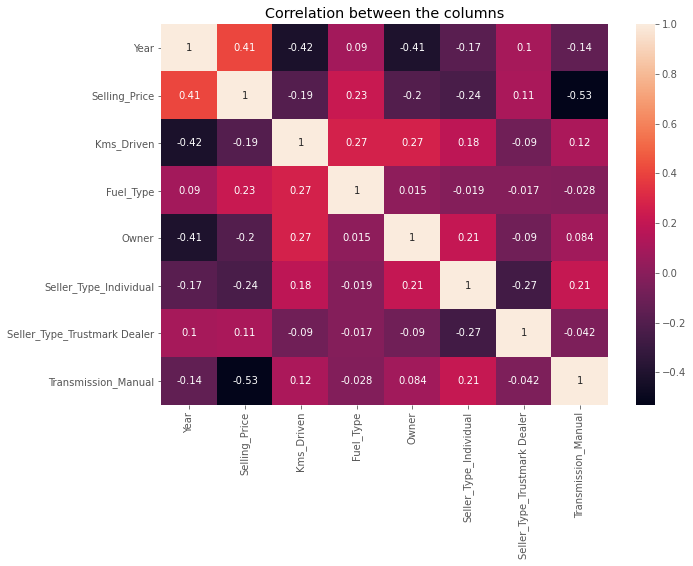

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(car_data.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [18]:
X = car_data.drop(['Car_Name','Selling_Price'], axis=1)
y = car_data['Selling_Price']

In [19]:
print("Shape of X is: ",X.shape)
print("Shape of y is: ", y.shape)

Shape of X is:  (4340, 7)
Shape of y is:  (4340,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


In [21]:
print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_test shape: ", y_test.shape)
print("y_train shape:", y_train.shape)

X_test shape: (1302, 7)
X_train shape: (3038, 7)
y_test shape:  (1302,)
y_train shape: (3038,)


In [22]:
scaler = StandardScaler()

In [23]:
print(car_data['Owner'].value_counts())

0    2832
1    1106
2     304
3      81
4      17
Name: Owner, dtype: int64


In [24]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [25]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [26]:
pred = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [28]:
print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("R2 score: ", (metrics.r2_score(pred, y_test)))

MAE:  220033.19218318496
MSE:  167707313455.7726
R2 score:  -0.14159301638854105


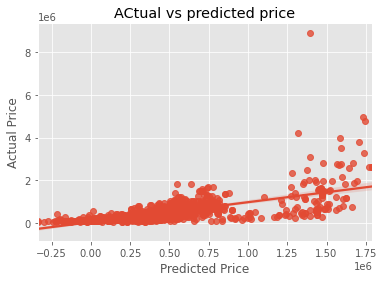

In [29]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("ACtual vs predicted price")
plt.show()

In [30]:
X_test

array([[-0.74981388,  0.294691  ,  0.85152479, ...,  0.57506975,
        -0.15580474,  0.34491839],
       [ 1.38931498, -0.8253772 , -0.96514116, ...,  0.57506975,
        -0.15580474,  0.34491839],
       [-1.22517584, -0.51423071, -0.96514116, ...,  0.57506975,
        -0.15580474,  0.34491839],
       ...,
       [-0.51213289,  0.71735824,  0.85152479, ...,  0.57506975,
        -0.15580474,  0.34491839],
       [ 0.91395302, -1.3325779 ,  0.85152479, ...,  0.57506975,
        -0.15580474,  0.34491839],
       [-0.98749486, -0.33930987,  4.4848567 , ...,  0.57506975,
        -0.15580474,  0.34491839]])

In [31]:
X_train


array([[-0.27445191, -0.34302934, -0.96514116, ..., -1.73891951,
        -0.15580474,  0.34491839],
       [ 0.67627203,  0.61169143,  0.85152479, ...,  0.57506975,
        -0.15580474,  0.34491839],
       [-0.51213289,  0.1256241 ,  0.85152479, ..., -1.73891951,
        -0.15580474,  0.34491839],
       ...,
       [ 0.67627203, -0.31817651,  0.85152479, ..., -1.73891951,
        -0.15580474,  0.34491839],
       [-0.03677092,  0.294691  ,  0.85152479, ...,  0.57506975,
        -0.15580474,  0.34491839],
       [-0.03677092,  0.294691  , -0.96514116, ...,  0.57506975,
        -0.15580474,  0.34491839]])

In [ ]:
X_train